In [4]:
import pandas as pd

# Load the data
df = pd.read_csv('medical_examination .csv')



In [12]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


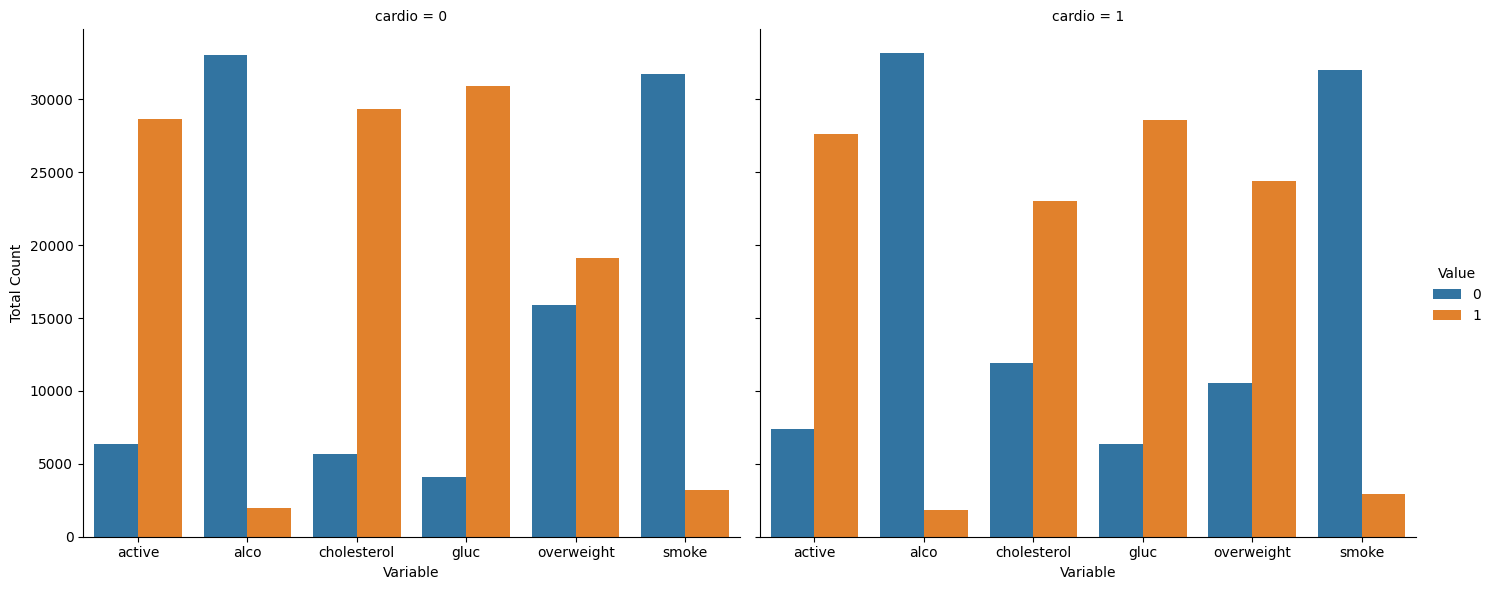

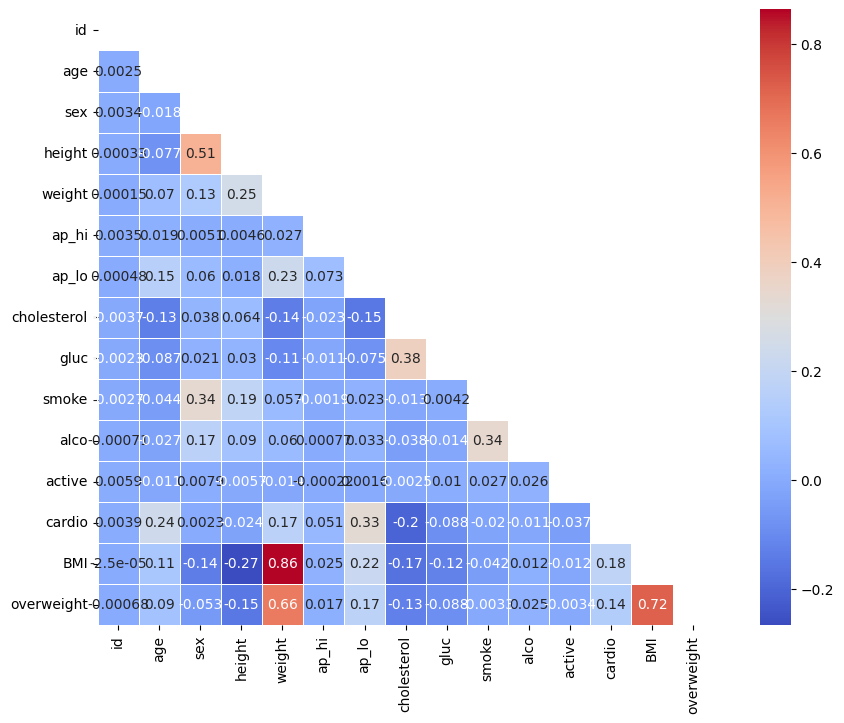

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)  # height is in cm, so divide by 100 to convert to meters
df['overweight'] = (df['BMI'] > 25).astype(int)

df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

def draw_cat_plot():
    # Melt the data
    df_cat = pd.melt(df, 
                     id_vars='cardio', 
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group the data and count occurrences
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size()

    # Rename 'size' to 'total'
    df_cat = df_cat.rename(columns={'size': 'total'})

    # Create the categorical plot
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', 
                      data=df_cat, kind='bar', height=6, aspect=1.2)

    # Set labels and legend
    fig.set_axis_labels("Variable", "Total Count")
    fig._legend.set_title("Value")


    plt.show()

    return fig


draw_cat_plot()


def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]


    corr = df_heat.corr()

    
    mask = np.triu(np.ones_like(corr, dtype=bool))

    
    plt.figure(figsize=(12, 8))

    sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", square=True, linewidths=.5)

    
    plt.show()


draw_heat_map()


In [32]:
import pandas as pd

def calculate_correlation_matrix(df):
    # Step 1: Clean the data by removing outliers
    df_clean = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Step 2: Calculate the correlation matrix
    corr = df_clean.corr()

    return corr

# Example usage:
# Assuming df is already loaded with the medical data
correlation_matrix = calculate_correlation_matrix(df)

# Print the correlation matrix
print(correlation_matrix)


                   id       age       sex    height    weight     ap_hi  \
id           1.000000  0.002507  0.003426  0.000326  0.000149  0.003492   
age          0.002507  1.000000 -0.018132 -0.076932  0.070168  0.018689   
sex          0.003426 -0.018132  1.000000  0.505785  0.129979  0.005063   
height       0.000326 -0.076932  0.505785  1.000000  0.251503  0.004586   
weight       0.000149  0.070168  0.129979  0.251503  1.000000  0.027030   
ap_hi        0.003492  0.018689  0.005063  0.004586  0.027030  1.000000   
ap_lo        0.000484  0.153508  0.059947  0.017922  0.227922  0.072803   
cholesterol -0.003719 -0.129996  0.037605  0.063522 -0.135981 -0.022807   
gluc        -0.002289 -0.086990  0.021357  0.030469 -0.107072 -0.011111   
smoke       -0.002732 -0.044371  0.337436  0.187830  0.056533 -0.001928   
alco        -0.000708 -0.026970  0.168637  0.089785  0.059917  0.000769   
active       0.005891 -0.011445  0.007864 -0.005661 -0.014430 -0.000222   
cardio       0.003900  0.